In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract

In [2]:

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [3]:
url=r"C:\Users\arman\OneDrive\Desktop\OMR1.png"
url1=r"C:\Users\arman\OneDrive\Desktop\OMR2.png"
url2=r"C:\Users\arman\OneDrive\Desktop\OMR3.png"
image=cv2.imread(url2)

In [4]:
key=[1,2,3,4,4,3,2,1,2,2]

In [5]:
image=cv2.resize(image,(547,673))

In [6]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

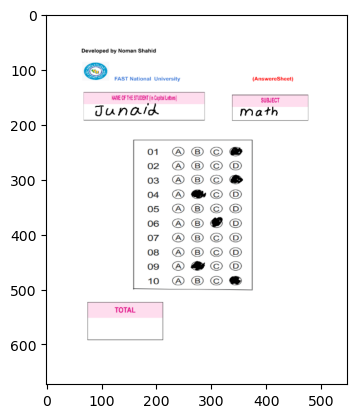

In [7]:
plt.imshow(image)

In [8]:
# image=cv2.GaussianBlur(image,(5,5),3)
# image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# sobelx=cv2.Sobel(image,-1,1,0)
# sobely=cv2.Sobel(image,-1,0,1)
# add=cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
# canny=cv2.Canny(image,50,150)
# plt.imshow(canny)

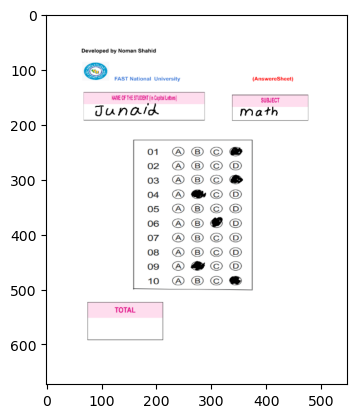

In [9]:
plt.imshow(image)

In [10]:
image_=image.copy()
image=image_.copy()

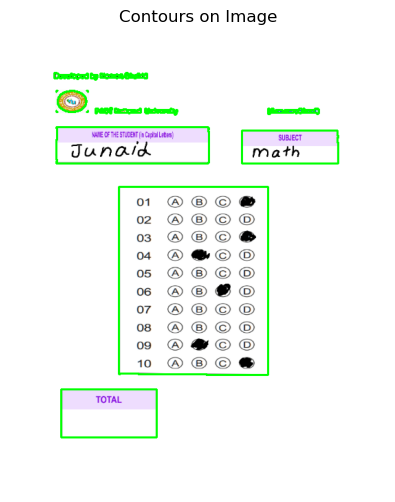

In [11]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use adaptive thresholding to enhance weak edges
thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2
)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_contours = image.copy()
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Contours on Image')
plt.show()

In [12]:

# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ret, image_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# contours, hierarchy = cv2.findContours(image_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# image_contours = image.copy()
# cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)

# image_rgb = cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB)

# plt.figure(figsize=(8, 6))
# plt.imshow(image_rgb)
# plt.axis('off')
# plt.title('Contours on Image')
# plt.show()

In [13]:
area=[]
for c in contours:
    if cv2.contourArea(c)>800:
        area.append(c)

In [14]:
len(area)

5

In [15]:
sort_count=sorted(area,key=cv2.contourArea,reverse=False)

In [16]:
# sort_count

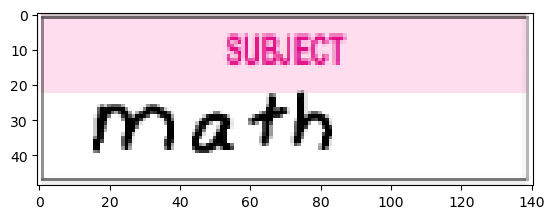

In [17]:
sort_con=sort_count[1]
x, y, w, h = cv2.boundingRect(sort_con)
bubble=image[y:y+h,x:x+w]
plt.imshow(bubble)

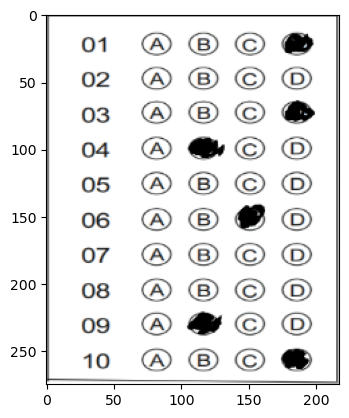

In [18]:
size=[]
for i in range(len(sort_count)):
    sort_con=sort_count[i]
    x, y, w, h = cv2.boundingRect(sort_con)
    size.append(x+y+w+h)
    
size_=max(size)
index=size.index(size_)
sort_con=sort_count[index]
x, y, w, h = cv2.boundingRect(sort_con)
bubble=image[y:y+h,x:x+w]
plt.imshow(bubble)

In [19]:
bubble.shape[0]

275

In [20]:
def split_rows(block_img, num_rows):
    rows = []
    height = block_img.shape[0]
    row_height = height // num_rows
    
    for i in range(num_rows):
        start_y = i * row_height
        end_y = (i + 1) * row_height
        row_img = block_img[start_y:end_y, :]
        rows.append(row_img)
    return rows


In [21]:
image_crop=bubble.copy()

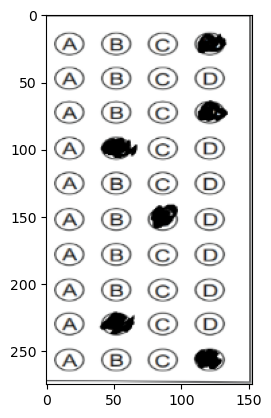

In [22]:
image_crop=image_crop[:,65:]
plt.imshow(image_crop)

In [23]:
def split_columns(block_img,num_columns):
    columns = []
    width= block_img.shape[1]
    columns_width=width//num_columns
    
    for i in range(num_columns):
        start_y = i * columns_width
        end_y = (i + 1) * columns_width
        column_img = block_img[:,start_y:end_y]
        columns.append(column_img)
    return columns


In [24]:
def is_filled(option):
    gray_image=cv2.cvtColor(option,cv2.COLOR_BGR2GRAY)
    ret,image_binary=cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY)
    zeros=cv2.countNonZero(image_binary)
    return zeros

In [25]:
rows=split_rows(image_crop,10)
marked=[]
not_attempted=0

for row in rows:
    columns=split_columns(row,4)
    array=[]
    for idx,option in enumerate(columns):
        zeros=is_filled(option)
        array.append(zeros)
        min_value=min(array)
        index=array.index(min_value)
        check=0
    for i in range(0,4):
        if array[i]==min_value:
           check=check+1
    if check==4:
       not_attempted=not_attempted+1
       marked.append(0)
    else:
      marked.append(index+1)

    

In [26]:
marked

[4, 4, 4, 2, 0, 3, 0, 0, 2, 4]

In [27]:
# Make sure image is in BGR (OpenCV uses BGR not RGB)
image_out =bubble.copy()
h,w=bubble.shape[:2]
row_height = h// 10
column_width = w//8
hard_core=[3,4]
hard_core1=[2,6,5]
if len(marked)==0:
     marked=[0,0,0,0,0,0,0,0,0,0]
for i in range(10):
    ans=marked[i]
    x=(ans*row_height)+row_height//4
    y=(i*column_width)+column_width//4
    if i in hard_core and marked[i]!=0:
         cv2.circle(image_out, (x+70, y+20), 8, (255,0, 0), 2)
    elif i in hard_core1 and marked[i]!=0:
         cv2.circle(image_out, (x+60, y+20), 8, (255, 0, 0), 2)
    else:
        if marked[i]!=0:
           cv2.circle(image_out, (x+50, y+20), 8, (255, 0, 0), 2)
for i in range(10):
    ans=key[i]
    x=(ans*row_height)+row_height//4
    y=(i*column_width)+column_width//4
    if i in hard_core and marked[i]!=0:
         cv2.circle(image_out, (x+70, y+20), 8, (0, 255, 0), 2)
    elif i in hard_core1 and marked[i]!=0:
         cv2.circle(image_out, (x+60, y+20), 8, (0,255, 0), 2)
    else:
         if marked[i]!=0:
            cv2.circle(image_out, (x+50, y+20), 8, (0,255, 0), 2)

In [28]:

cv2.imshow("Result", cv2.cvtColor(image_out, cv2.COLOR_RGB2BGR))  # OpenCV uses BGR
cv2.waitKey(0)
cv2.destroyAllWindows()

# Or save it
# cv2.imwrite("graded_output.png", cv2.cvtColor(image_out, cv2.COLOR_RGB2BGR))


In [29]:
total=0
checker=0
for i in range(9):
    if marked[i]==key[i]:
       checker=checker+1
       total=total+10

print(f"Your total score is:{total}%")
print(f"Total Correct is{checker}")   

Your total score is:20%
Total Correct is2


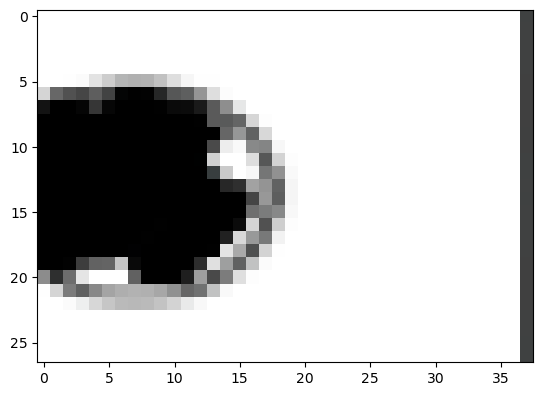

In [30]:
plt.imshow(columns[3])
image_binary=columns[3]

In [31]:
ret,image_binary=cv2.threshold(columns[3],0,255,cv2.THRESH_BINARY)

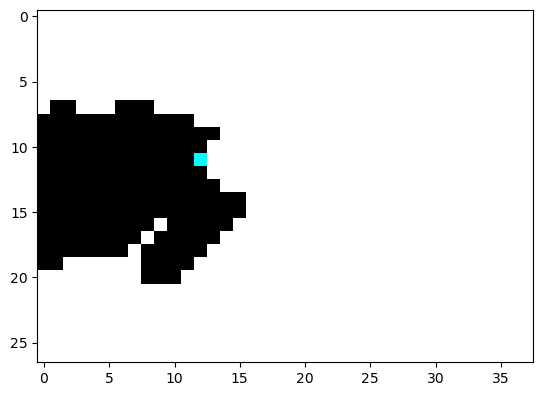

In [32]:
plt.imshow(image_binary)

In [33]:
# image_binray= cv2.cvtColor(image_binary, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(image_binary, cv2.COLOR_BGR2GRAY)
image_binary= cv2.adaptiveThreshold(gray, 255, 
                                     cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY_INV, 
                                     11, 2)

In [34]:
image_binary.shape

(27, 38)

In [35]:
# # image_binary=cv2.cvtColor(image_binary,cv2.COLOR_BGR2GRAY)
# image_binary= cv2.cvtColor(image_binary, cv2.COLOR_BGR2HSV)
# image_binary= cv2.inRange(image_binary, (0, 0, 0), (180, 255,100)) 

In [36]:
image_binary.shape

(27, 38)

In [37]:
bi=cv2.countNonZero(image_binary)

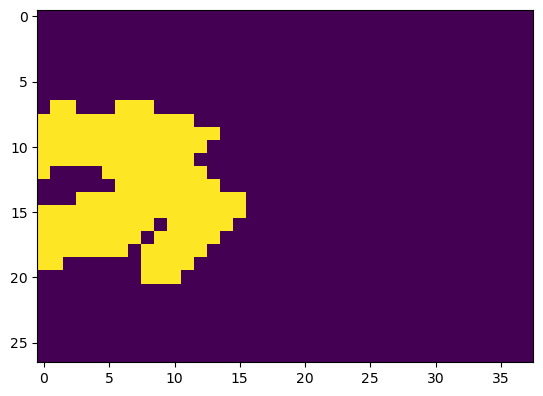

In [38]:
plt.imshow(image_binary)

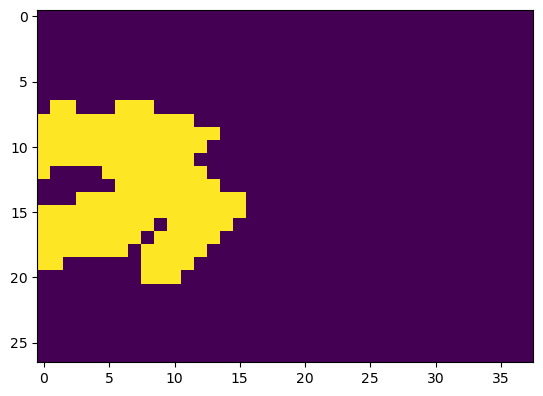

In [39]:
plt.imshow(image_binary)

In [40]:
bi

150

## Name_detection

In [41]:
len(sort_count)

5

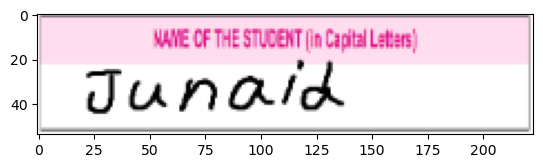

In [42]:
size=0
array=[]
for i in range(len(sort_count)):
     sort_con=sort_count[i]
     x, y, w, h = cv2.boundingRect(sort_con)
     size=x+w+h+y
     array.append(size)
     if size>400 and size<500:
        size=i
        break
         
sort_con=sort_count[size]    
x, y, w, h = cv2.boundingRect(sort_con)
student_name=image[y:y+h,x:x+w]
student_name=student_name[25:,:]
plt.imshow(student_name)

In [43]:
print(array)
size

[232, 673, 808, 485]


3

In [44]:
student_name.shape

(54, 223, 3)

In [45]:
gray = cv2.cvtColor(student_name, cv2.COLOR_BGR2GRAY)

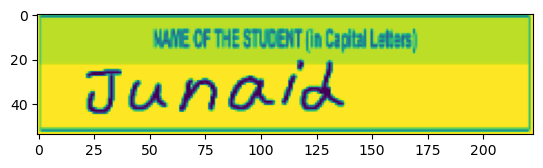

In [46]:
# ret,gray=cv2.threshold(gray,0,255,cv2.THRESH_BINARY)
# gray = cv2.adaptiveThreshold(
#     gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
#     cv2.THRESH_BINARY, 11, 2
# )

plt.imshow(gray)

In [47]:
text=pytesseract.image_to_string(gray,config='--psm 7')
name=text.strip()
if len(name)>2:
   print("Student Name Detected:",name)
else:
   print("Student Name Detected: None")

Student Name Detected: 4 uno.


In [48]:
area=[]
for c in contours:
    if cv2.contourArea(c)>1000:
        area.append(c)

In [49]:
gray = cv2.cvtColor(student_name, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 3)
# gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                              cv2.THRESH_BINARY, 11, 2)


In [50]:
gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)


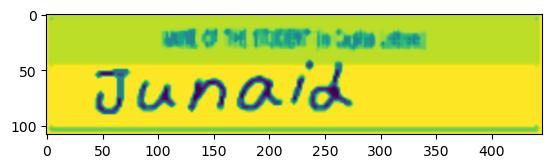

In [51]:
plt.imshow(gray)

In [52]:
text=pytesseract.image_to_string(gray,config='--psm 7')
name=text.strip()
if len(name)>2:
   print("Student Name Detected:",name)
else:
   print("Student Name Detected: None")

Student Name Detected: None


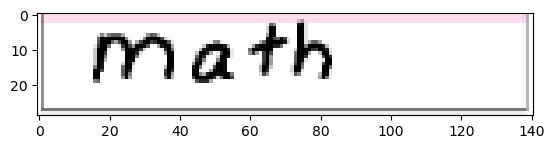

In [56]:
size=0
array=[]
for i in range(len(sort_count)):
     sort_con=sort_count[i]
     x, y, w, h = cv2.boundingRect(sort_con)
     size=x+w+h+y
     array.append(size)
     if size>600 and size<700:
        size=i
        break
         
sort_con=sort_count[size]    
x, y, w, h = cv2.boundingRect(sort_con)
student_name=image[y:y+h,x:x+w]
student_name=student_name[20:,:]
plt.imshow(student_name)

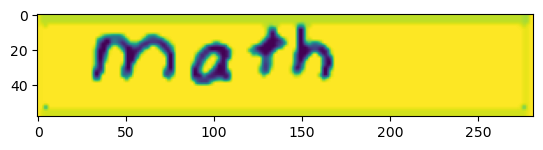

In [57]:

gray = cv2.cvtColor(student_name, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 3)
# gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                              cv2.THRESH_BINARY, 11, 2)
gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
plt.imshow(gray)


In [58]:
text=pytesseract.image_to_string(gray,config='--psm 7')
name=text.strip()
if len(name)>2:
   print("Student Name Detected:",name)
else:
   print("Student Name Detected: None")

Student Name Detected: Math
